# 1.0 Data Cleaning

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [177]:
import numpy as np
import pandas as pd

In [178]:
df = pd.read_excel('C:\\Users\\winso\\OneDrive - Universiti Malaya\\Principle of Data Science\\Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

The **Total Charges** column appears to be of object type, however, it should ideally be numeric.

In [180]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors = 'coerce')
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

The ***Total Charges*** column now appears to have 11 NAN values which might resulted when we transform the type to be numeric.

The ***Churn Reason*** column has only 1869 non-null rows.

In [181]:
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


The ***Total Charges*** column will be compute based on Tenure Months and Monthly Charges. The values computed might be slightly different from the actual amount due to the implementation of taxes and other fees. But the rows with NaN value isn't occupy a huge portion to the whole dataset. So, we will progress with the imputation of ***Tenure Months * Monthly Charges***.

In [182]:
df['Total Charges'].fillna(df['Tenure Months'] * df['Monthly Charges'], inplace = True)

C:\Users\winso\AppData\Local\Temp\ipykernel_28408\2995481833.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [183]:
df[df['Churn Reason'].isna()].head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,61,3441,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,43,4459,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0,51,2013,NaN
1874,6388-TABGU,1,United States,California,Los Angeles,90011,"34.00709, -118.258681",34.007090,-118.258681,Male,No,No,No,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0,58,4529,NaN
1875,9763-GRSKD,1,United States,California,Los Angeles,90012,"34.065875, -118.238728",34.065875,-118.238728,Male,No,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,0,76,5764,NaN
1876,7469-LKBCI,1,United States,California,Los Angeles,90013,"34.044639, -118.240413",34.044639,-118.240413,Male,No,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No,0,39,4726,NaN
1877,8091-TTVAX,1,United States,California,Los Angeles,90014,"34.043144, -118.251977",34.043144,-118.251977,Male,No,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No,0,71,6432,NaN
1878,5129-JLPIS,1,United States,California,Los Angeles,90016,"34.028331, -118.354338",34.028331,-118.354338,Male,No,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No,0,75,5822,NaN


The absence of values in the ***Churn Reason*** column is due to customers who did not churn, making the presence of churn reasons irrelevant.

The presence of null values is attributed to customers who did not churn, hence, **Not Churn** has been assigned as a placeholder value.

In [184]:
df["Churn Reason"].fillna("Not Churn", inplace = True)

C:\Users\winso\AppData\Local\Temp\ipykernel_28408\4030060370.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [186]:
print(df.nunique())
df[['CustomerID', 'Count', 'Country', 'State','Tenure Months']].nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           21
dtype: int64


CustomerID       7043
Count               1
Country             1
State               1
Tenure Months      73
dtype: int64

It is evident from the above that the ***Count***, ***Country***, and ***State*** columns contain only one distinct value each, indicating that all entries originate from the same country and state. Additionally, the ***Customer ID*** column has the same number of rows as the total number of observations, implying each customer possesses a unique identifier. Therefore, these columns will be excluded from further analysis.

In [187]:
print (df['Tenure Months'].max())

72


In [188]:
labels = ["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
df['Tenure Group'] = pd.cut(df['Tenure Months'], range(1,80,12), right = False, labels = labels)
df['Tenure Group'].value_counts()

Tenure Group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

Modeling can be challenging when dealing with numerous discrete values for ***Tenure Month***. To simplify the process, we'll aggregate these values into yearly groups.

In [189]:
df.drop(['CustomerID','Count','Country','State','Lat Long','Tenure Months','Churn Score', 'CLTV'], axis = 1, inplace = True)

In [190]:
df.columns

Index(['City', 'Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Reason',
       'Tenure Group'],
      dtype='object')

In [191]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

City: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Zip Code: [90003 90005 90006 ... 96128 96134 96146]
Latitude: [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
Longitude: [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
Gender: ['Male' 'Female']
Senior Citizen: ['No' 'Yes']
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
Phone Service: ['Yes' 'No']
Multiple Lines: ['No' 'Yes' 'No phone service']
Internet Service: ['DSL' 'Fiber optic' 'No']
Online Security: ['Yes' 'No' 'No internet service']
Online Backup: ['Yes' 'No' 'No internet service']
Device Protection: ['No' 'Yes' 'No internet service']
Tech Support: ['No' 'Yes' 'No internet service']
Streaming TV: ['No' 'Yes' 'No internet service']
Streaming Movies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'Two year' 'One year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (au

# 2.0 Exploratory Data Analysis (EDA)

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   City               7043 non-null   object  
 1   Zip Code           7043 non-null   int64   
 2   Latitude           7043 non-null   float64 
 3   Longitude          7043 non-null   float64 
 4   Gender             7043 non-null   object  
 5   Senior Citizen     7043 non-null   object  
 6   Partner            7043 non-null   object  
 7   Dependents         7043 non-null   object  
 8   Phone Service      7043 non-null   object  
 9   Multiple Lines     7043 non-null   object  
 10  Internet Service   7043 non-null   object  
 11  Online Security    7043 non-null   object  
 12  Online Backup      7043 non-null   object  
 13  Device Protection  7043 non-null   object  
 14  Tech Support       7043 non-null   object  
 15  Streaming TV       7043 non-null   object  
 16  Stream

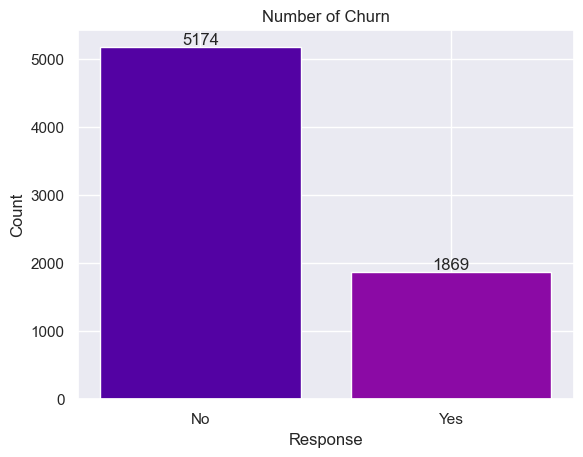

In [194]:
churn_count = df['Churn Label'].value_counts()

sns.set(style = 'darkgrid')

bars = plt.bar(churn_count.keys(), churn_count, color = sns.color_palette('plasma'))
plt.title('Number of Churn')
plt.xlabel('Response')
plt.ylabel('Count')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.show()

C:\Users\winso\AppData\Local\Temp\ipykernel_28408\3872183952.py:24: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



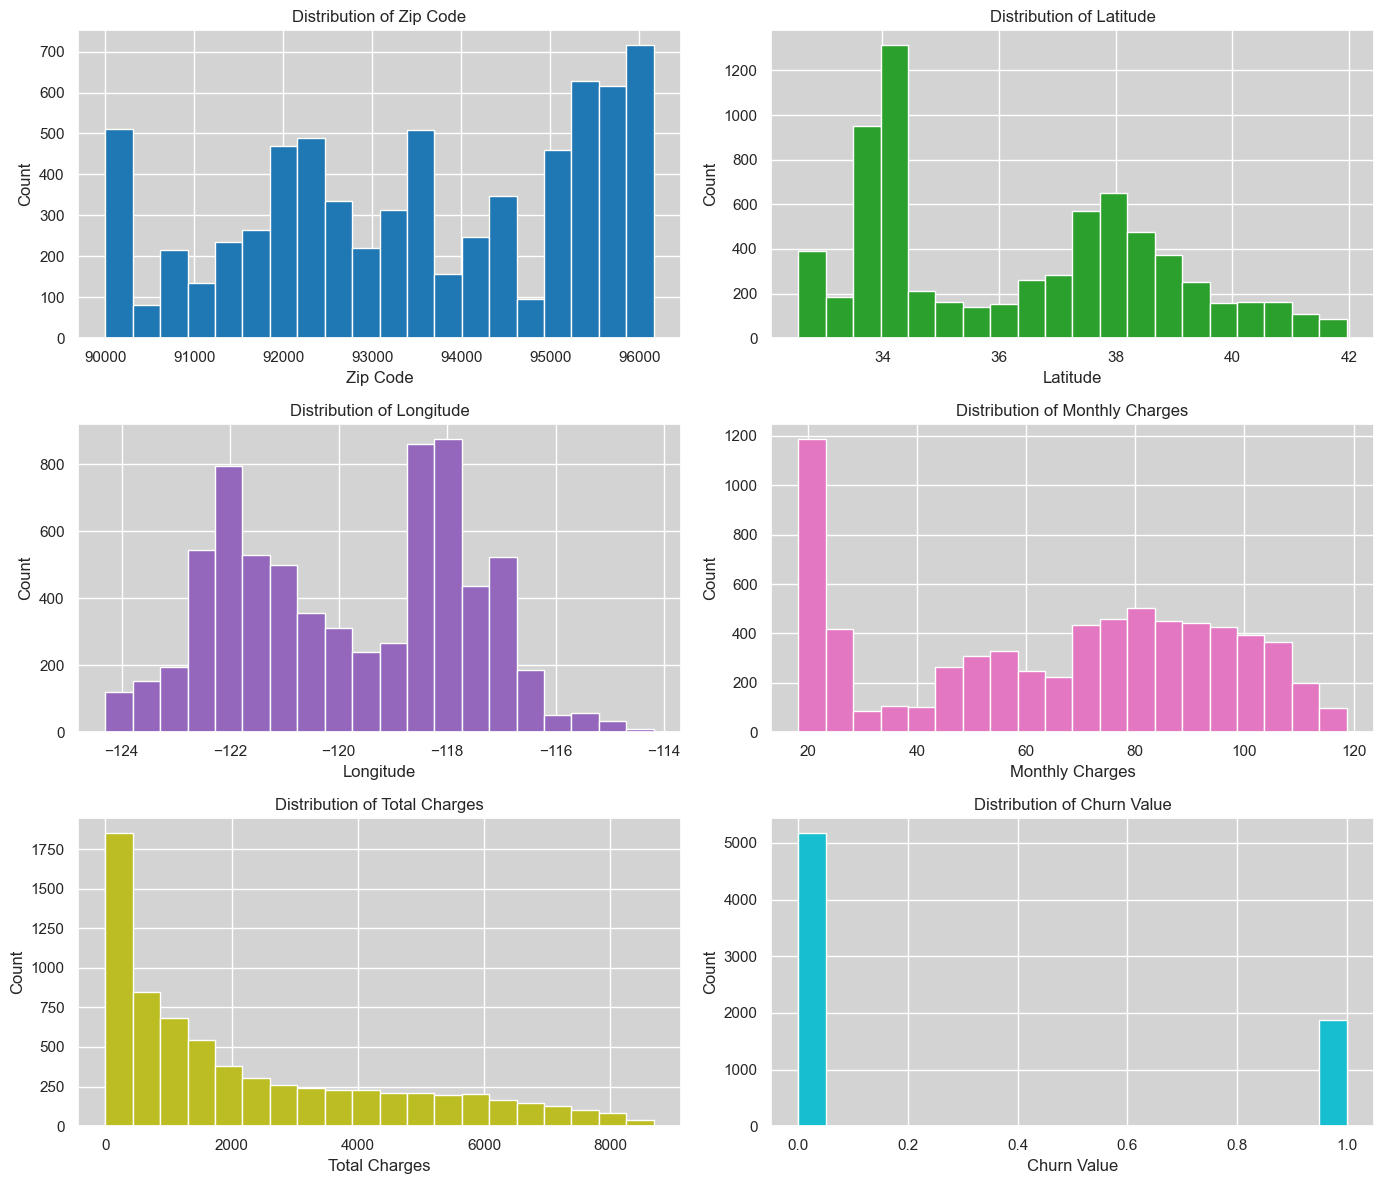

In [195]:
numerical_features = [
    'Zip Code',
    'Latitude',
    'Longitude',
    'Monthly Charges',
    'Total Charges',
    'Churn Value'
]

num_features = len(numerical_features)
num_rows = num_features // 2
num_cols = 2
if num_features % 2 != 0:
    num_rows += 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 4*num_rows))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

if num_rows > 1:
    axes = axes.ravel()
else:
    axes = [axes]

color_map = plt.cm.get_cmap('tab10', num_features)

for idx, feature in enumerate(numerical_features):
    ax = axes[idx]
    ax.grid(color='white', zorder=1)
    ax.hist(df[feature], bins=20, color=color_map(idx), alpha=1.0, zorder=2)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_facecolor('lightgrey')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

C:\Users\winso\AppData\Local\Temp\ipykernel_28408\105662128.py:40: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



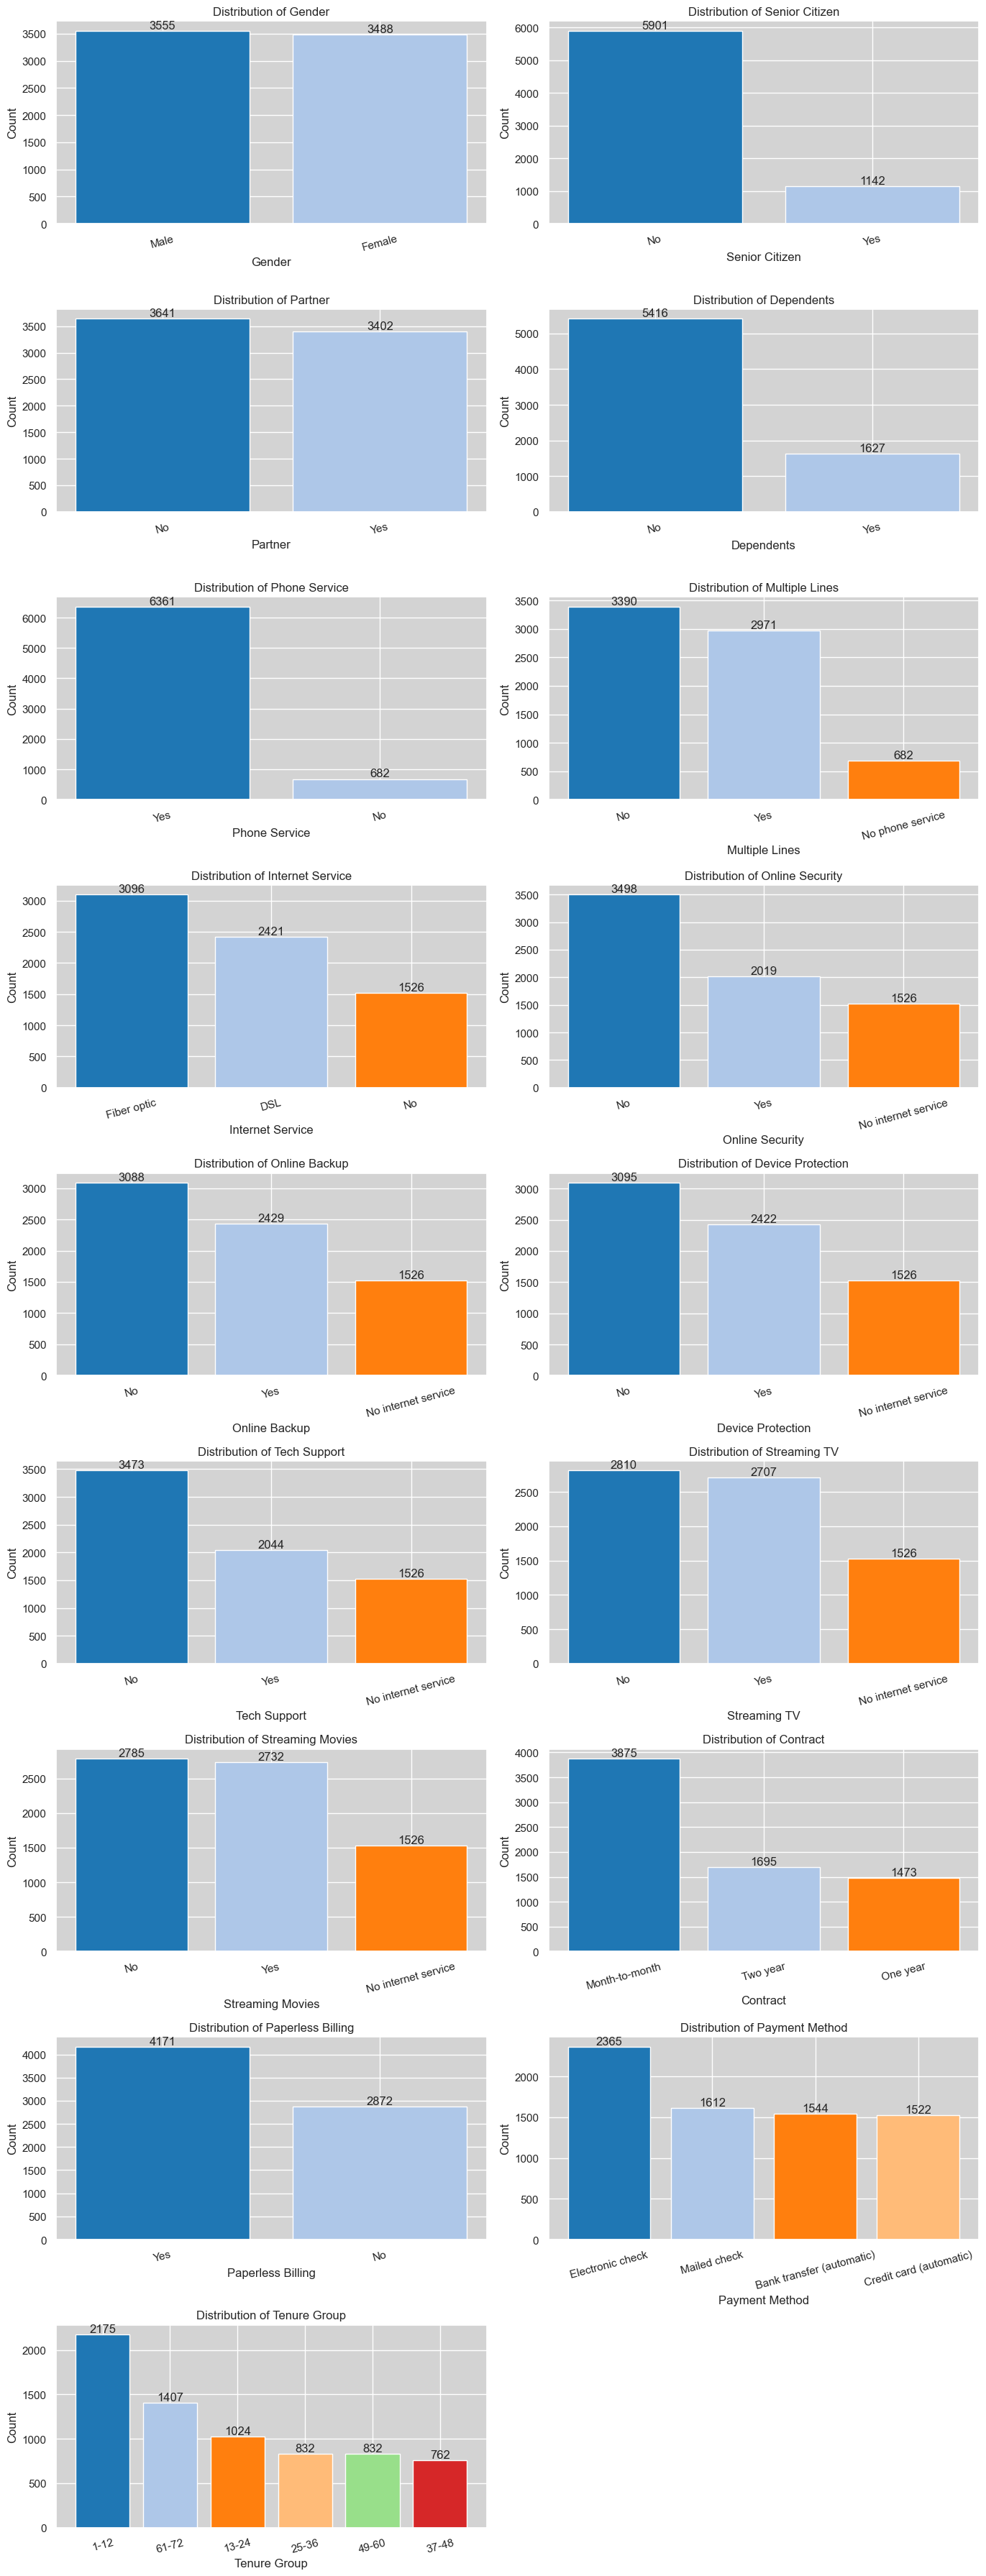

In [196]:
import math

categorical_features = [
    'Gender',
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Contract',
    'Paperless Billing',
    'Payment Method',
    'Churn Label',
    'Churn Reason',
    'Tenure Group'
]

excluded_columns = ['Total Charges', 'Churn Label', 'Churn Reason']
categorical_features = [col for col in categorical_features if col not in excluded_columns]

num_features = len(categorical_features)
num_rows = math.ceil(num_features / 2)
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 4*num_rows))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

if num_rows > 1:
    axes = axes.ravel()
else:
    axes = [axes]

color_map = plt.cm.get_cmap('tab20', num_features)

for idx, feature in enumerate(categorical_features):
    ax = axes[idx]
    value_counts = df[feature].value_counts()
    colors = [color_map(i) for i in range(len(value_counts))]
    ax.bar(value_counts.index, value_counts.values, color=colors, alpha=1.0, zorder=2,
           edgecolor='white')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=15)
    ax.set_facecolor('lightgrey')
    ax.grid(color='white', zorder=1)

    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')

    for i, v in enumerate(value_counts.values):
        ax.text(i, v + 0.2, str(v), ha='center', va='bottom')

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [197]:
percentages = round(df['Churn Label'].value_counts(normalize = True) * 100, 2)
print(percentages)

Churn Label
No     73.46
Yes    26.54
Name: proportion, dtype: float64


The bar chart and percentage reveal that customer churn in the telecommunication company is significant, accounting for over 25% of the total observations. This underscores the urgency of further analysis on this issue.

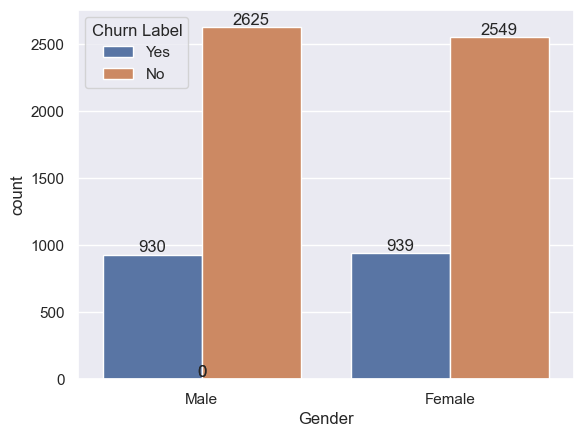

In [198]:
g3 = sns.countplot(x = 'Gender', hue = 'Churn Label', data = df, order = df['Gender'].value_counts().index)

for bar in g3.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')


plt.show()

In [199]:
df_filtered = df[df['Churn Reason'] != 'Not Churn']
reason_count = df_filtered['Churn Reason'].value_counts()

sns.set(style = 'white')
g1 = px.bar(x = reason_count.keys(), y = reason_count, color = reason_count, text = reason_count,
             title = 'Number of Churn Reason', width = 1000, height = 600)

g1.update_layout(
    yaxis_title = 'Churn Reason',
    xaxis_title = 'Count',
)

g1.show()

The graph highlights that external factors, primarily driven by competitors offering faster speeds, more data, and enticing offers, exert a significant influence. Conversely, internal factors, such as the attitudes of support personnel and service providers, play a more prominent role.

In [200]:
g2 = px.scatter_mapbox(df,
                       lat = 'Latitude',
                       lon = 'Longitude',
                       title = 'Counts of Churning in US',
                       zoom = 4
)

g2.update_layout(mapbox_style='open-street-map')  # Use OpenStreetMap tiles
g2.update_layout(margin={'l': 0, 'r': 0, 't': 30, 'b': 0})  # Adjust margins

g2.show()

In [201]:
gender_churn = df.groupby(['Gender', 'Churn Label']).size().unstack(fill_value = 0)
gender_churn['Percentage'] = gender_churn['Yes'] / (gender_churn['Yes'] + gender_churn['No']) * 100
gender_churn

Churn Label,No,Yes,Percentage
Gender,,,
Female,2549,939,26.920872
Male,2625,930,26.160338


The churn rate for both males and females is approximately 26%. This suggests that there isn't a distinct pattern evident in this dataset.

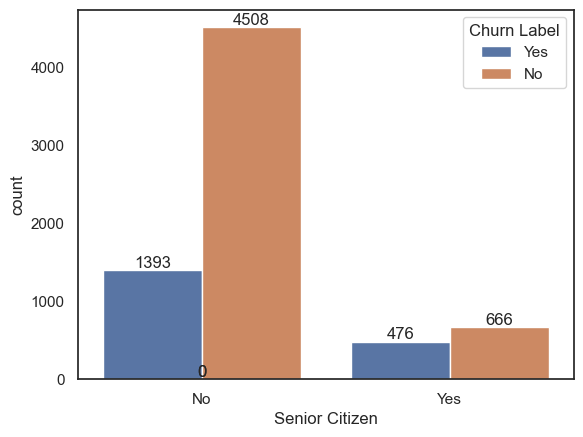

In [202]:
g4 = sns.countplot(x = 'Senior Citizen', hue = 'Churn Label', data = df, order = df['Senior Citizen'].value_counts().index)

for bar in g4.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.show()

In [203]:
senior_churn = df.groupby(['Senior Citizen', 'Churn Label']).size().unstack(fill_value = 0)
senior_churn['Percentage'] = senior_churn['Yes'] / (senior_churn['Yes'] + senior_churn['No']) * 100
senior_churn

Churn Label,No,Yes,Percentage
Senior Citizen,,,
No,4508,1393,23.606168
Yes,666,476,41.681261


Observations indicate that the younger generation tends to exhibit a lower churn rate compared to the senior generation, likely due to a lesser degree of enthusiasm for technology among the latter.

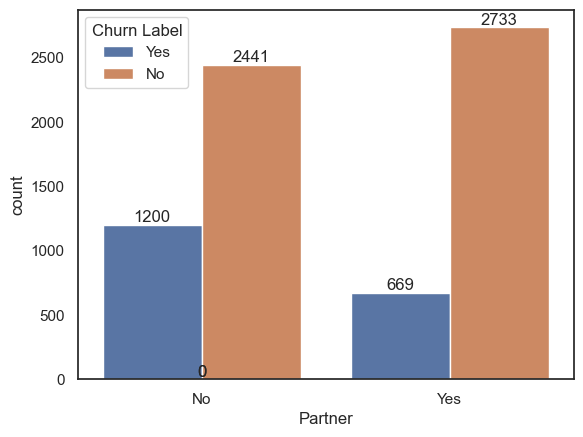

In [204]:
g5 = sns.countplot(x = 'Partner', hue = 'Churn Label', data = df, order = df['Partner'].value_counts().index)

for bar in g5.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha = 'center', va = 'bottom')

plt.show()

In [205]:
partner_churn = df.groupby(['Partner', 'Churn Label']).size().unstack(fill_value = 0)
partner_churn['Percentage'] = partner_churn['Yes'] / (partner_churn['Yes'] + partner_churn['No']) * 100
partner_churn

Churn Label,No,Yes,Percentage
Partner,,,
No,2441,1200,32.957979
Yes,2733,669,19.664903


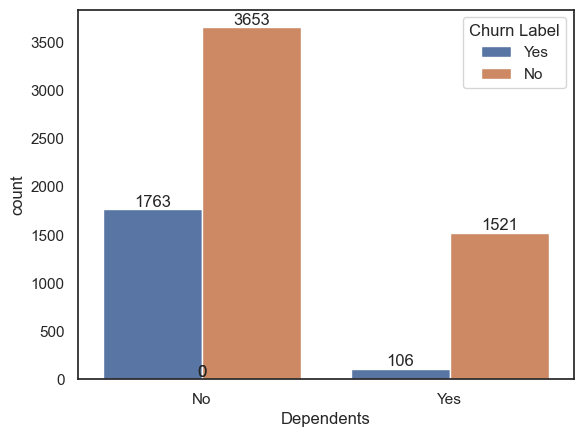

In [206]:
g6 = sns.countplot(x = 'Dependents', hue = 'Churn Label', data = df, order = df['Dependents'].value_counts().index)

for bar in g6.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha = 'center', va = 'bottom')

plt.show()

In [207]:
dependents_churn = df.groupby(['Dependents', 'Churn Label']).size().unstack(fill_value = 0)
dependents_churn['Percentage'] = dependents_churn['Yes'] / (dependents_churn['Yes'] + dependents_churn['No']) * 100
dependents_churn

Churn Label,No,Yes,Percentage
Dependents,,,
No,3653,1763,32.551699
Yes,1521,106,6.515058


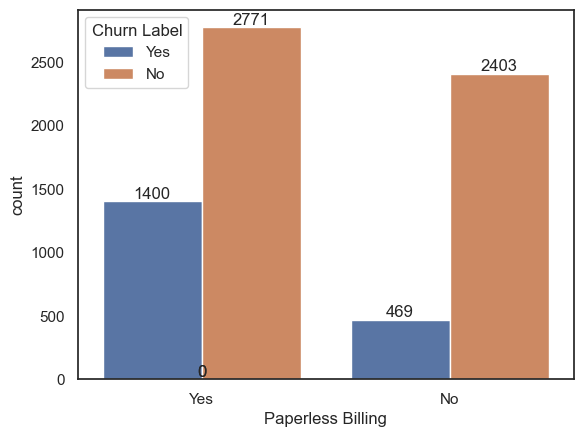

In [208]:
g7 = sns.countplot(x = 'Paperless Billing', hue = 'Churn Label', data = df, order = df['Paperless Billing'].value_counts().index)

for bar in g7.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha = 'center', va = 'bottom')

plt.show()

In [209]:
pb_churn = df.groupby(['Paperless Billing', 'Churn Label']).size().unstack(fill_value = 0)
pb_churn['Percentage'] = pb_churn['Yes'] / (pb_churn['Yes'] + pb_churn['No']) * 100
pb_churn

Churn Label,No,Yes,Percentage
Paperless Billing,,,
No,2403,469,16.330084
Yes,2771,1400,33.565092


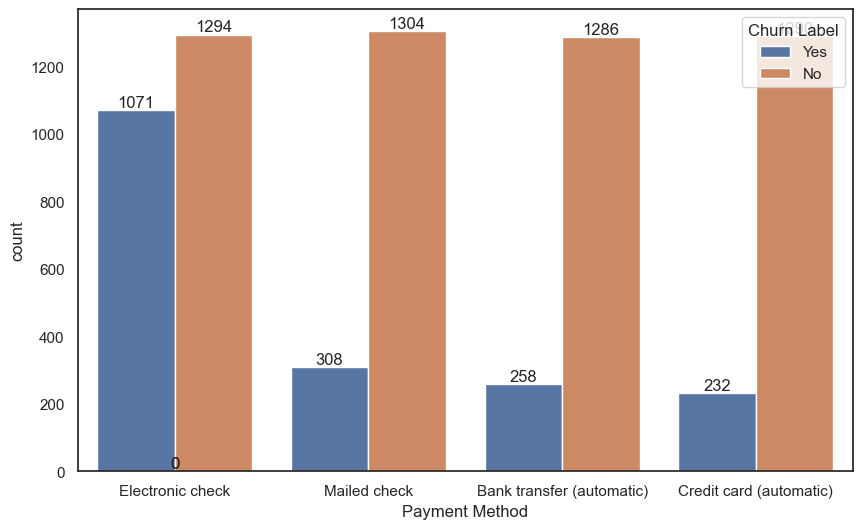

In [210]:
plt.figure(figsize=(10, 6))

g8 = sns.countplot(x = 'Payment Method', hue = 'Churn Label', data = df, order = df['Payment Method'].value_counts().index)

for bar in g8.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha = 'center', va = 'bottom')

plt.show()

In [211]:
pm_churn = df.groupby(['Payment Method', 'Churn Label']).size().unstack(fill_value = 0)
pm_churn['Percentage'] = pm_churn['Yes'] / (pm_churn['Yes'] + pm_churn['No']) * 100
pm_churn

Churn Label,No,Yes,Percentage
Payment Method,,,
Bank transfer (automatic),1286,258,16.709845
Credit card (automatic),1290,232,15.243101
Electronic check,1294,1071,45.285412
Mailed check,1304,308,19.106700


The graph illustrates that Electronic check emerges as the preferred payment method among customers, yet it also exhibits the highest rate of churning.

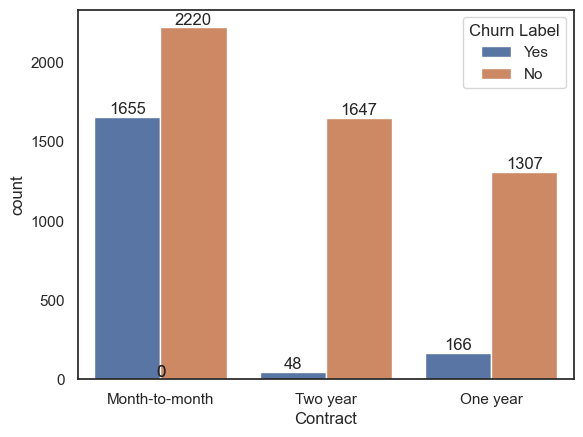

In [212]:
g9 = sns.countplot(x = 'Contract', hue = 'Churn Label', data = df, order = df['Contract'].value_counts().index)

for bar in g9.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha = 'center', va = 'bottom')

plt.show()

In [213]:
contract_churn = df.groupby(['Contract', 'Churn Label']).size().unstack(fill_value = 0)
contract_churn['Percentage'] = contract_churn['Yes'] / (contract_churn['Yes'] + contract_churn['No']) * 100
contract_churn

Churn Label,No,Yes,Percentage
Contract,,,
Month-to-month,2220,1655,42.709677
One year,1307,166,11.269518
Two year,1647,48,2.831858


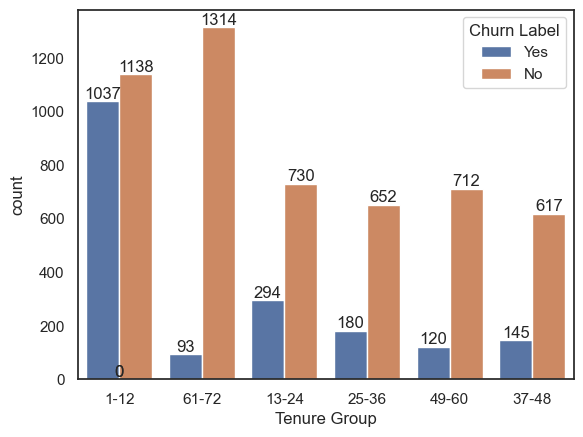

In [214]:
g10 = sns.countplot(x = 'Tenure Group', hue = 'Churn Label', data = df, order = df['Tenure Group'].value_counts().index)

for bar in g10.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha = 'center', va = 'bottom')

plt.show()

In [215]:
tg_churn = df.groupby(['Tenure Group', 'Churn Label']).size().unstack(fill_value = 0)
tg_churn['Percentage'] = tg_churn['Yes'] / (tg_churn['Yes'] + tg_churn['No']) * 100
tg_churn

C:\Users\winso\AppData\Local\Temp\ipykernel_28408\4113349924.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Churn Label,No,Yes,Percentage
Tenure Group,,,
1-12,1138,1037,47.678161
13-24,730,294,28.710938
25-36,652,180,21.634615
37-48,617,145,19.028871
49-60,712,120,14.423077
61-72,1314,93,6.609808


Both graphs illustrate that opting for short-term contracts leads to higher churn rates, likely due to the freedom to withdraw at any time without significant financial commitment.

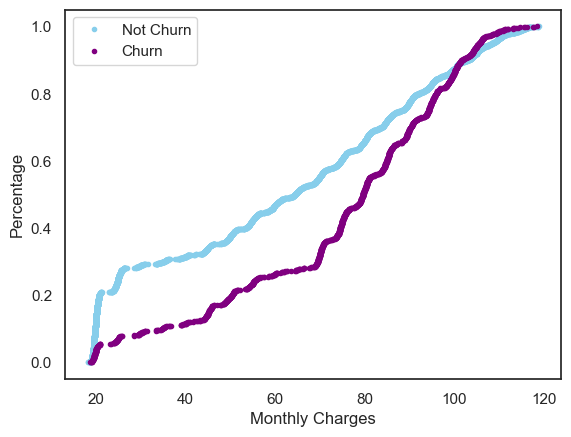

In [216]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x_churn_no, y_churn_no = ecdf(df['Monthly Charges'][df["Churn Label"] == 'No'])
x_churn_yes, y_churn_yes = ecdf(df['Monthly Charges'][df["Churn Label"] == 'Yes'])

plt.plot(x_churn_no, y_churn_no, marker='.', linestyle='none', label='Not Churn', color="skyblue")
plt.plot(x_churn_yes, y_churn_yes, marker='.', linestyle='none', label='Churn', color = "purple")
plt.legend(["Not Churn", "Churn"], loc='upper right')
plt.xlabel('Monthly Charges')
plt.ylabel('Percentage')
plt.legend()
plt.show()

It's noticeable that the monthly charges for churn instances are lower compared to non-churn cases. However, this observation appears counterintuitive, as theoretically, lower charges should correlate with a lower likelihood of churning. This phenomenon might align with the earlier analysis suggesting that customers with lower charges tend to have fewer services, possibly contributing to their decision to churn.

## 2.1 Let's examine how churn is influenced by the various services provided.

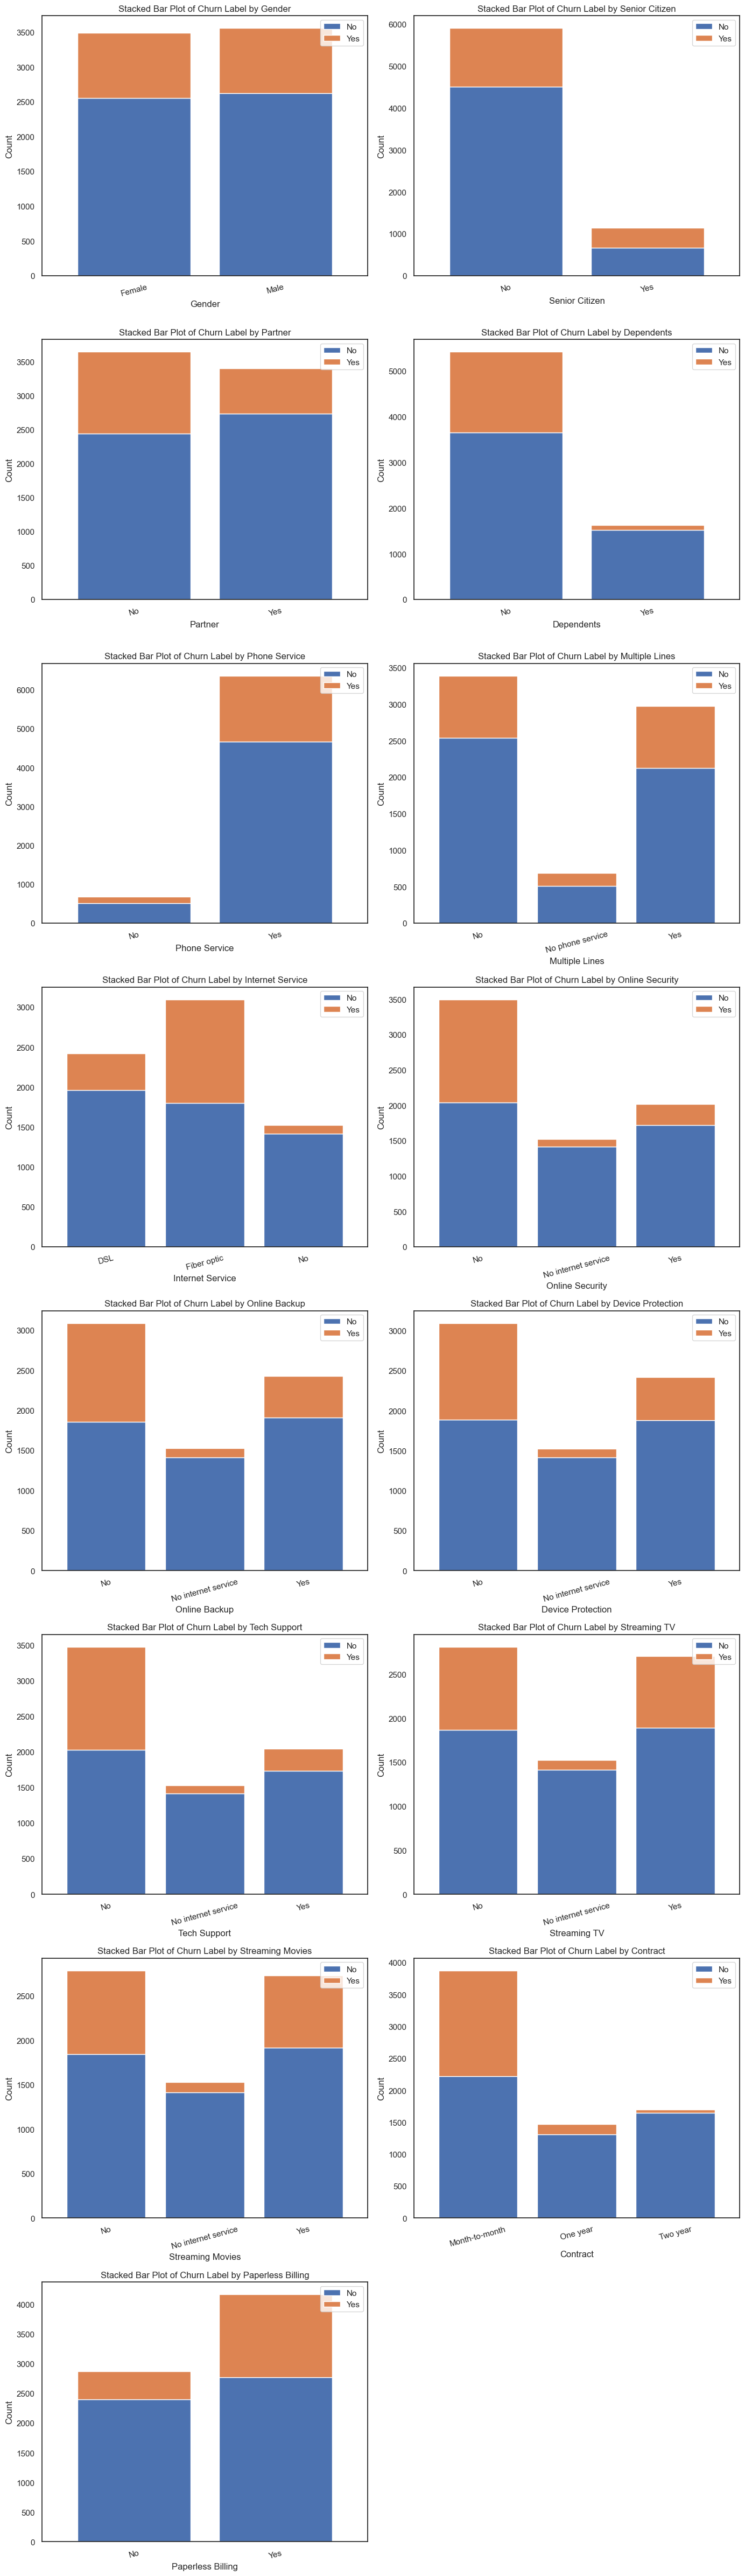

In [217]:
categorical_features = [
    'Gender',
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Contract',
    'Paperless Billing',
    'Payment Method',
]

num_features = len(categorical_features)
num_rows = num_features // 2
num_cols = 2 if num_features > 1 else 1

categorical_features_without_tenure = [feature for feature in categorical_features if feature != 'Tenure Group']

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 6*num_rows))
fig.subplots_adjust(hspace=0.8)

if num_rows > 1:
    axes = axes.ravel()
else:
    axes = [axes]

for idx, feature in enumerate(categorical_features_without_tenure):
    contingency_table = pd.crosstab(df[feature], df['Churn Label'])
    ax = axes[idx]
    contingency_table.plot(kind='bar', stacked=True, ax=ax, legend=True, width=0.8)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(f'Stacked Bar Plot of Churn Label by {feature}')
    ax.legend(loc='upper right')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

for i in range(num_features - 1, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [218]:
g_ps = df.groupby(['Phone Service','Churn Label'])['Churn Value'].count().reset_index()
fig1 = px.pie(g_ps, values='Churn Value', names='Phone Service', facet_col='Churn Label', title='Phone Service Distribution')

fig1.update_layout(
    title_font=dict(size=30),
    legend_font=dict(size=30),
    font=dict(size=30)
)
fig1.update_traces(textfont_size=30)
fig1.show()

In [219]:
g_ml = df.groupby(['Multiple Lines','Churn Label'])['Churn Value'].count().reset_index()
fig1 = px.pie(g_ml, values = 'Churn Value', names = 'Multiple Lines', facet_col = 'Churn Label', title = 'Multiple Lines Distribution')
# Increasing text size for title, legend, and facet labels
fig1.update_layout(
    title_font=dict(size=30),
    legend_font=dict(size=30),
    font=dict(size=30)  # Adjust the value as per your preference
)
fig1.update_traces(textfont_size=30)
fig1.show()

In [220]:
g_is = df.groupby(['Internet Service','Churn Label'])['Churn Value'].count().reset_index()
fig1 = px.pie(g_is, values = 'Churn Value', names = 'Internet Service', facet_col = 'Churn Label', title = 'Internet Service Distribution')

fig1.update_layout(
    title_font=dict(size=30),
    legend_font=dict(size=30),
    font=dict(size=30)
)
fig1.update_traces(textfont_size=30)
fig1.show()

In [221]:
g_os = df.groupby(['Online Security','Churn Label'])['Churn Value'].count().reset_index()
fig1 = px.pie(g_os, values = 'Churn Value', names = 'Online Security', facet_col = 'Churn Label', title = 'Online Security Distribution')

fig1.update_layout(
    title_font=dict(size=30),
    legend_font=dict(size=30),
    font=dict(size=30)
)
fig1.update_traces(textfont_size=30)
fig1.show()

In [222]:
g_ob = df.groupby(['Online Backup','Churn Label'])['Churn Value'].count().reset_index()
fig1 = px.pie(g_ob, values = 'Churn Value', names = 'Online Backup', facet_col = 'Churn Label', title = 'Online Backup Distribution')

fig1.update_layout(
    title_font=dict(size=30),
    legend_font=dict(size=30),
    font=dict(size=30)
)
fig1.update_traces(textfont_size=30)
fig1.show()

In [223]:
g_dp = df.groupby(['Device Protection','Churn Label'])['Churn Value'].count().reset_index()
fig1 = px.pie(g_dp, values = 'Churn Value', names = 'Device Protection', facet_col = 'Churn Label', title = 'Device Protection Distribution')

fig1.update_layout(
    title_font=dict(size=30),
    legend_font=dict(size=30),
    font=dict(size=30)
)
fig1.update_traces(textfont_size=30)
fig1.show()

In [224]:
g_ts = df.groupby(['Tech Support','Churn Label'])['Churn Value'].count().reset_index()
fig1 = px.pie(g_ts, values = 'Churn Value', names = 'Tech Support', facet_col = 'Churn Label', title = 'Tech Support Distribution')

fig1.update_layout(
    title_font=dict(size=30),
    legend_font=dict(size=30),
    font=dict(size=30)
)
fig1.update_traces(textfont_size=30)
fig1.show()

In [225]:
g_stv = df.groupby(['Streaming TV','Churn Label'])['Churn Value'].count().reset_index()
fig1 = px.pie(g_stv, values = 'Churn Value', names = 'Streaming TV', facet_col = 'Churn Label', title = 'Streaming TV Distribution')

fig1.update_layout(
    title_font=dict(size=30),
    legend_font=dict(size=30),
    font=dict(size=30)
)
fig1.update_traces(textfont_size=30)
fig1.show()

In [226]:
g_smv = df.groupby(['Streaming Movies','Churn Label'])['Churn Value'].count().reset_index()
fig1 = px.pie(g_smv, values = 'Churn Value', names = 'Streaming Movies', facet_col = 'Churn Label', title = 'Streaming Movies Distribution')

fig1.update_layout(
    title_font=dict(size=30),
    legend_font=dict(size=30),
    font=dict(size=30)
)
fig1.update_traces(textfont_size=30)
fig1.show()

Among the services provided, the **presence of fiber optic, absence of online security, lack of online backup, absence of device protection, and absence of tech support** stand out as factors with the greatest impact on customer churn compared to instances where churn is not observed. Conversely, the **absence of streaming TV, and streaming movies** contributes moderately to churn, while the **multiple lines service and presence or absence of phone service** appears to have minimal effect, with both churn and non-churn scenarios being common within this service category.

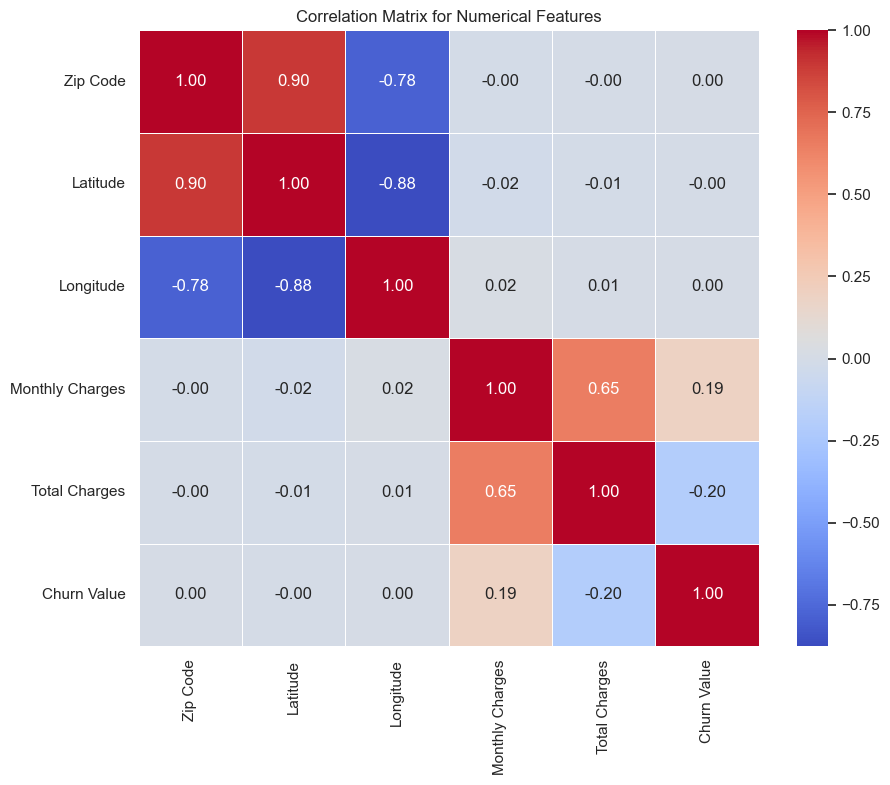

In [227]:
plt.figure(figsize=(10, 8))
numerical_features_except_count = [feature for feature in numerical_features if feature != 'Count']
correlation_matrix = df[numerical_features_except_count].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


C:\Users\winso\AppData\Local\Temp\ipykernel_28408\2166284967.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\winso\AppData\Local\Temp\ipykernel_28408\2166284967.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\winso\AppData\Local\Temp\ipykernel_28408\2166284967.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\winso\AppData\Local\Temp\ipykernel_28408\2166284967.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

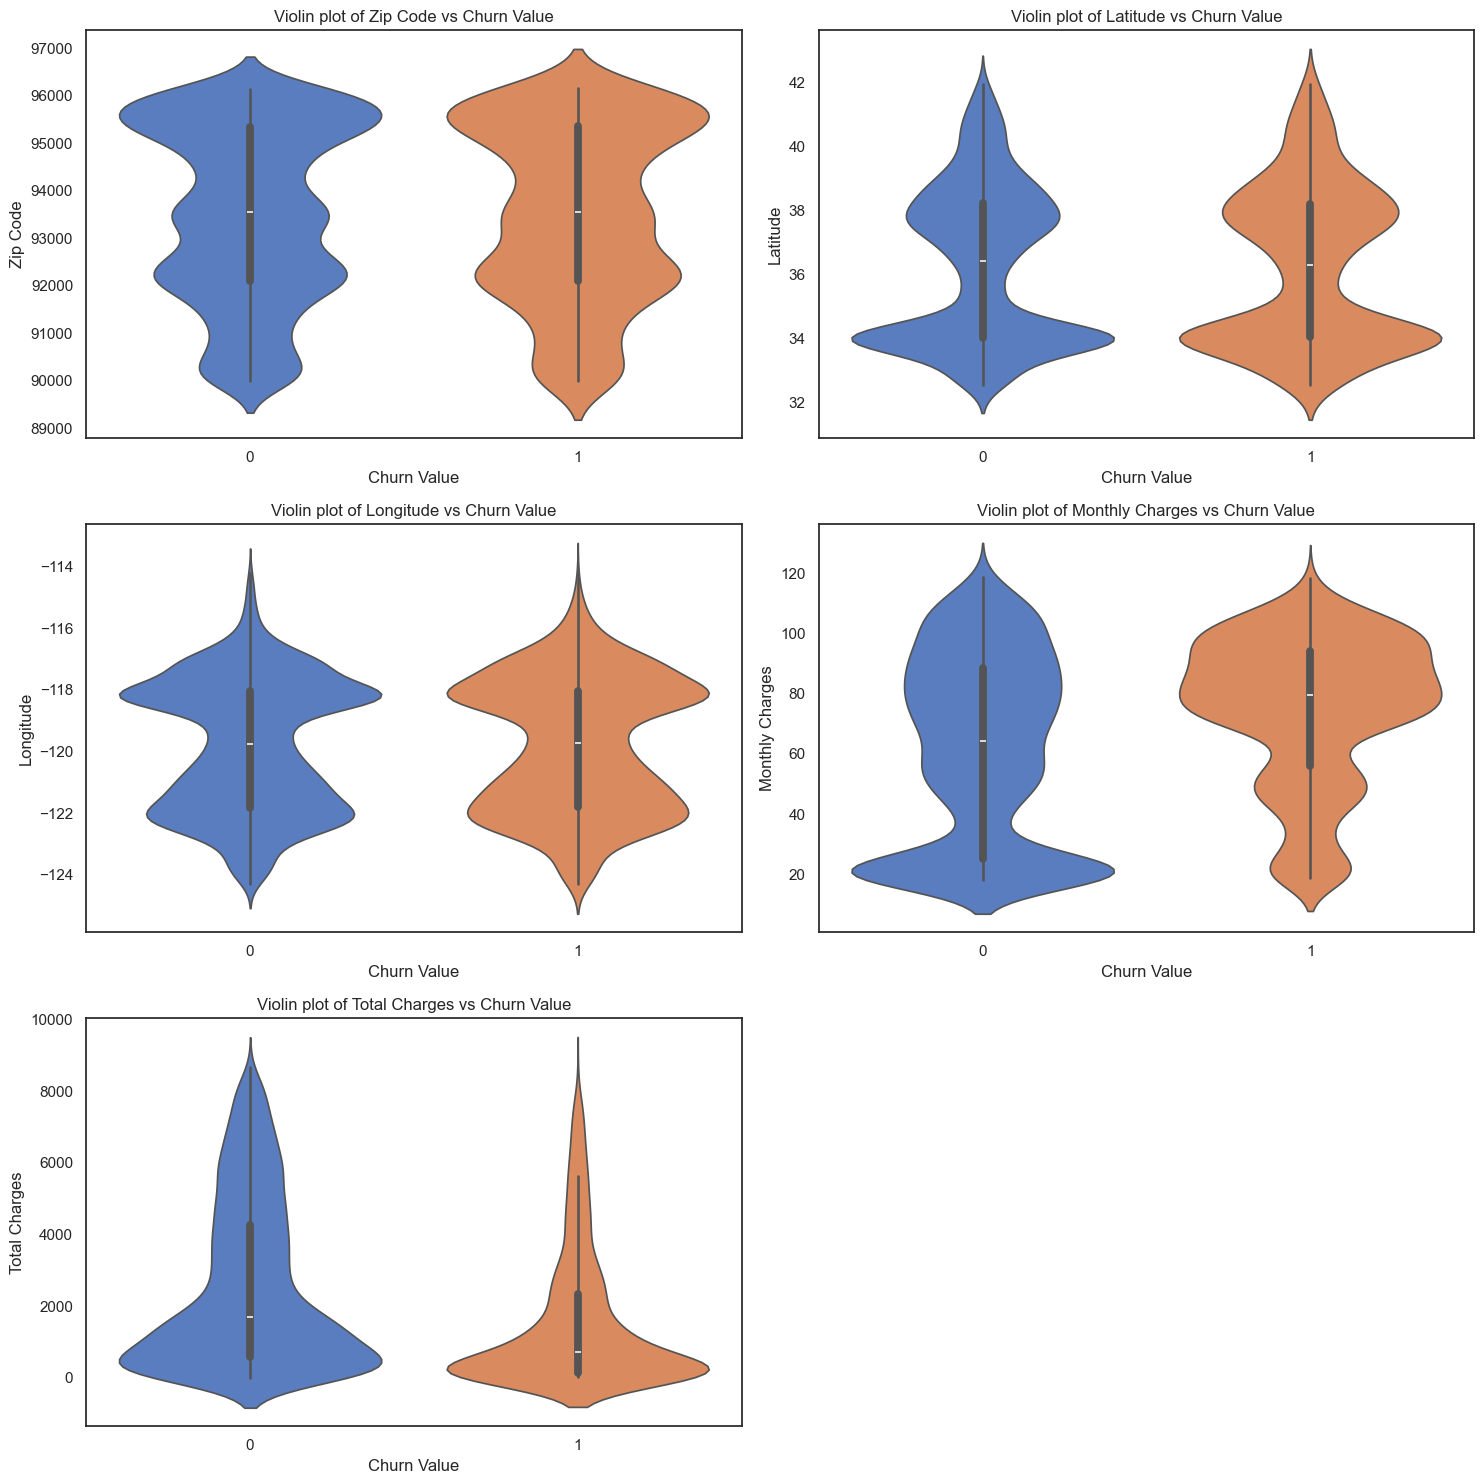

In [228]:
numerical_features_except_count = [feature for feature in numerical_features if feature != 'Count']
numerical_features_except_count = [feature for feature in numerical_features_except_count if feature != 'Churn Value']
num_features = len(numerical_features_except_count)
num_rows = num_features // 2
num_cols = 2
if num_features % 2 != 0:
    num_rows += 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for idx, feature in enumerate(numerical_features_except_count):
    sns.violinplot(data=df, x='Churn Value', y=feature, ax=axes[idx], palette='muted')
    axes[idx].set_title(f'Violin plot of {feature} vs Churn Value')
    axes[idx].set_ylabel(feature)
    axes[idx].set_xlabel('Churn Value')

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## 2.2 Insights

In [229]:
df_copy = df.copy()
df_copy['Churn Label'] = np.where(df_copy['Churn Label'] == 'Yes', 1, 0)
df_copy.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason,Tenure Group
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1,Competitor made better offer,1-12
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,Moved,1-12
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1,Moved,1-12
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,1,Moved,25-36
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,1,Competitor had better devices,49-60


In [230]:
df_copy.drop(['City','Zip Code','Latitude','Longitude','Churn Value','Churn Reason'], axis = 1, inplace = True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             7043 non-null   object  
 1   Senior Citizen     7043 non-null   object  
 2   Partner            7043 non-null   object  
 3   Dependents         7043 non-null   object  
 4   Phone Service      7043 non-null   object  
 5   Multiple Lines     7043 non-null   object  
 6   Internet Service   7043 non-null   object  
 7   Online Security    7043 non-null   object  
 8   Online Backup      7043 non-null   object  
 9   Device Protection  7043 non-null   object  
 10  Tech Support       7043 non-null   object  
 11  Streaming TV       7043 non-null   object  
 12  Streaming Movies   7043 non-null   object  
 13  Contract           7043 non-null   object  
 14  Paperless Billing  7043 non-null   object  
 15  Payment Method     7043 non-null   object  
 16  Monthl

In [231]:
df_dummies = pd.get_dummies(df_copy)
df_dummies.head()

,Monthly Charges,Total Charges,Churn Label,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Tenure Group_1-12,Tenure Group_13-24,Tenure Group_25-36,Tenure Group_37-48,Tenure Group_49-60,Tenure Group_61-72
0,53.85,108.15,1,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False
1,70.70,151.65,1,True,False,True,False,True,False,False,True,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False
2,99.65,820.50,1,True,False,True,False,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False
3,104.80,3046.05,1,True,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False
4,103.70,5036.30,1,False,True,True,False,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False


<Axes: >

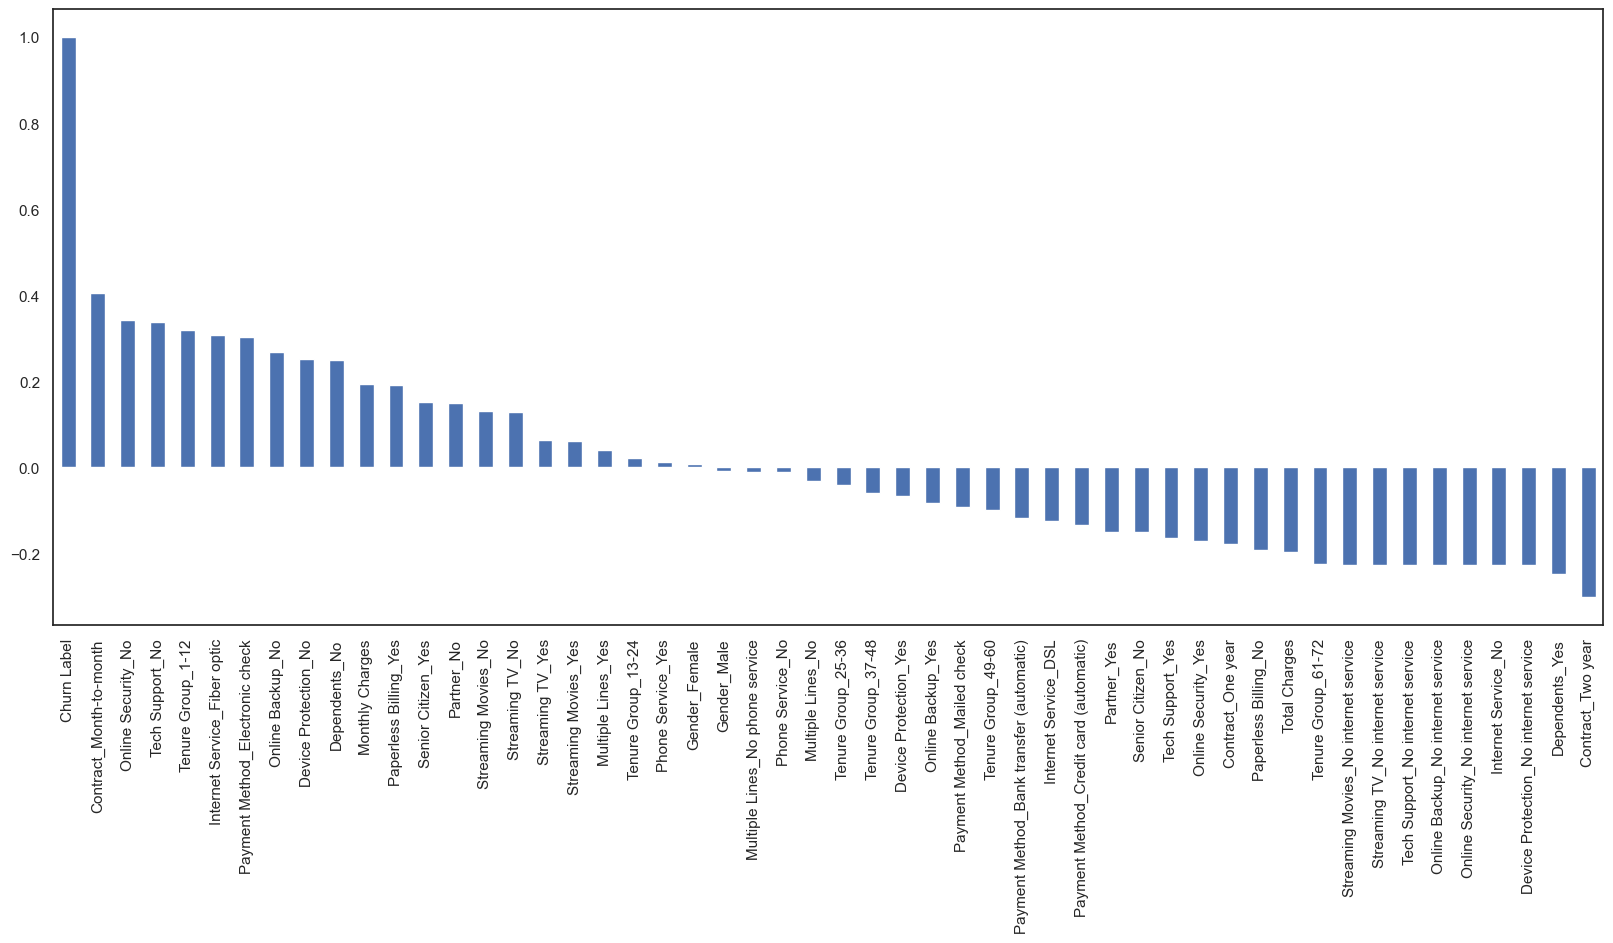

In [232]:
plt.figure(figsize = (20,8))
df_dummies.corr()['Churn Label'].sort_values(ascending = False).plot(kind = 'bar')

The correlation graph with **Churn Label** was computed, confirming that **Month-to-Month Contract**, **No Online Security**, **Tech Support**, **Fiber Optic Internet Service**, **No Online Backup**, and others are the main factors exhibiting a positive relationship with churning.

The **Presence or Absence of Phone Service**, **Multiple Lines**, and **Gender** also show no significant impact on churning.

Lastly, having a **Two-Year Contract** or **Subscribing without Internet Services** exhibits a negative relationship with churning.

Insight:
  - Shorter tenure months with fewer services will having a higher churning rate.
  - longer tenure rate without subscribing on internet services having a lower churning rate.

Additional Info:
  - Observations before also indicate that customers without dependents and partners tend to exhibit a higher churn rate.
  - However, further verification will be conducted without considering these two attributes. This approach allows us to prioritize the evaluation of internal service-related factors as the primary drivers of churn.g..

In [233]:
segmented_data = df.groupby(['Online Security', 'Internet Service', 'Device Protection', 'Tech Support', 'Contract'])['Churn Value'].mean().reset_index()
segmented_data_sorted = segmented_data.sort_values(by='Churn Value', ascending=False)

print(segmented_data_sorted.head())
print(segmented_data_sorted.tail())

   Online Security Internet Service Device Protection Tech Support  \
12              No      Fiber optic                No           No   
18              No      Fiber optic               Yes           No   
21              No      Fiber optic               Yes          Yes   
15              No      Fiber optic                No          Yes   
6               No              DSL               Yes           No   

          Contract  Churn Value  
12  Month-to-month     0.626617  
18  Month-to-month     0.558824  
21  Month-to-month     0.426087  
15  Month-to-month     0.422222  
6   Month-to-month     0.408000  
        Online Security Internet Service    Device Protection  \
11                   No              DSL                  Yes   
26  No internet service               No  No internet service   
41                  Yes      Fiber optic                   No   
29                  Yes              DSL                   No   
5                    No              DSL          

The segmentation table above provides additional validation of our earlier findings. It reaffirms that customers with month-to-month contracts and fewer subscribed services tend to exhibit the highest churn rates. Conversely, those with the lowest churn rates are consistent with our previous analysis, longer contract with no subscription on internet service, particularly when excluding groups with a churn rate of 0.

Finally, any churn score above 80 is classified as churn, while scores between 60 and 80 belong to the lower 50% of churn and the upper 25% of not churn. Using this criteria, we'll further categorize the scores into intervals of 20 to facilitate smoother modeling.

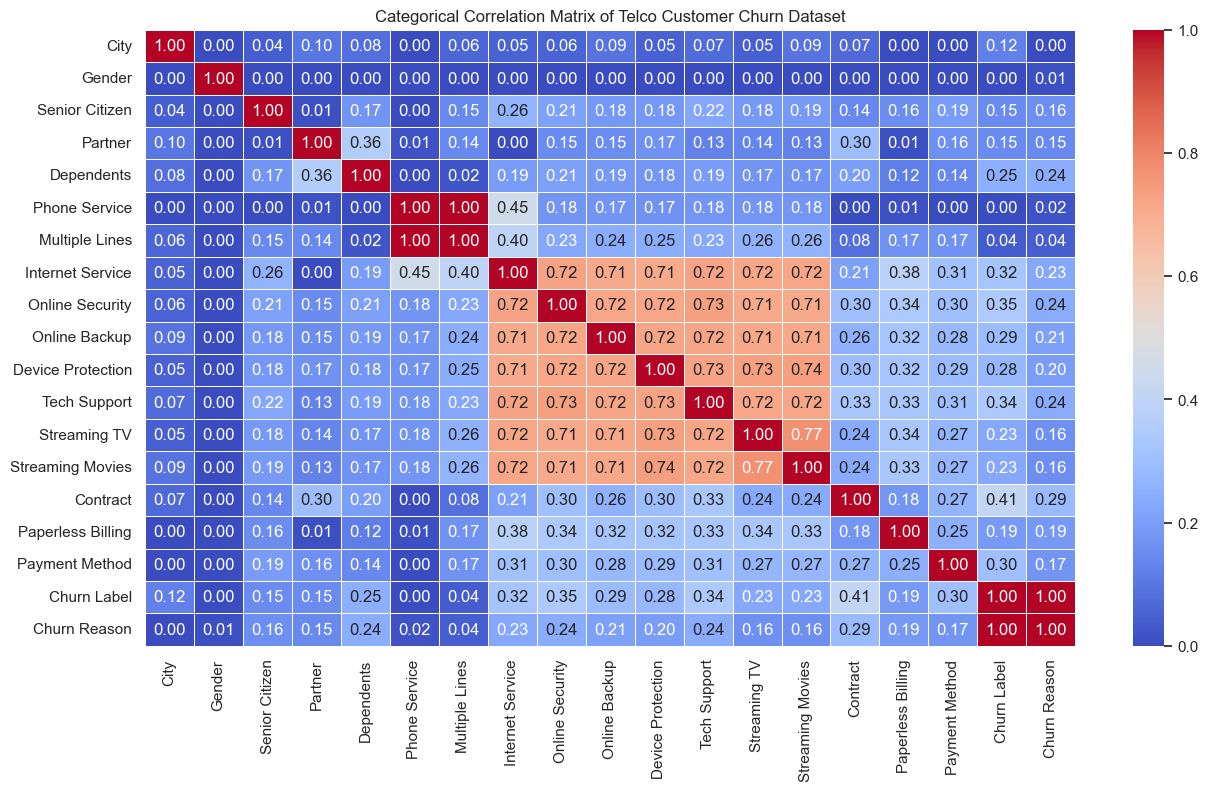

In [234]:
from scipy.stats import chi2_contingency
import numpy as np

telco_categorical = df.select_dtypes(include=['object'])

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

correlation_matrix = pd.DataFrame(index=telco_categorical.columns, columns=telco_categorical.columns)
for i in telco_categorical.columns:
    for j in telco_categorical.columns:
        correlation_matrix.loc[i, j] = cramers_v(telco_categorical[i], telco_categorical[j])

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Categorical Correlation Matrix of Telco Customer Churn Dataset')
plt.show()

In reviewing the correlation graph for categorical attributes, we observe minimal significant relationships between variables, except for known service factors. Regarding churn prediction, variables such as 'Gender,' 'Phone Service,' and 'Multiple Lines' are deemed non-contributory and will be considered excluded to enhance model performance.

# 3.0 Modeling

## Features Selection

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   City               7043 non-null   object  
 1   Zip Code           7043 non-null   int64   
 2   Latitude           7043 non-null   float64 
 3   Longitude          7043 non-null   float64 
 4   Gender             7043 non-null   object  
 5   Senior Citizen     7043 non-null   object  
 6   Partner            7043 non-null   object  
 7   Dependents         7043 non-null   object  
 8   Phone Service      7043 non-null   object  
 9   Multiple Lines     7043 non-null   object  
 10  Internet Service   7043 non-null   object  
 11  Online Security    7043 non-null   object  
 12  Online Backup      7043 non-null   object  
 13  Device Protection  7043 non-null   object  
 14  Tech Support       7043 non-null   object  
 15  Streaming TV       7043 non-null   object  
 16  Stream

In [236]:
df.drop(['City','Zip Code','Latitude','Longitude','Churn Label','Churn Reason','Gender','Phone Service','Multiple Lines'], axis = 1, inplace = True)

In [237]:
df.isnull().sum()

Senior Citizen        0
Partner               0
Dependents            0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges         0
Churn Value           0
Tenure Group         11
dtype: int64

In [238]:
df = df.dropna(subset=['Tenure Group'])
df['Tenure Group'] = df['Tenure Group'].astype('object')
df.describe(exclude='number').T

,count,unique,top,freq
Senior Citizen,7032,2,No,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,5412
Internet Service,7032,3,Fiber optic,3096
Online Security,7032,3,No,3497
Online Backup,7032,3,No,3087
Device Protection,7032,3,No,3094
Tech Support,7032,3,No,3472
Streaming TV,7032,3,No,2809
Streaming Movies,7032,3,No,2781


## Data Preprocessing

In [239]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [240]:
x = df.drop('Churn Value', axis = 1)
y = df['Churn Value']

In [241]:
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(include=['float64', 'int64']).columns

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

x_preprocessed = preprocessor.fit_transform(x)

In [242]:
categorical_cols

Index(['Senior Citizen', 'Partner', 'Dependents', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Tenure Group'],
      dtype='object')

In [243]:
categorical_cols

Index(['Senior Citizen', 'Partner', 'Dependents', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Tenure Group'],
      dtype='object')

## Handling Imbalanced Data

In [244]:
# spliting dataset
from sklearn import model_selection

# Resampling the dataset for imbalance
from imblearn.over_sampling import SMOTE

In [245]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_preprocessed, y, test_size = 0.2, random_state = 42)

SMOTE

In [246]:
smt = SMOTE(random_state = 42)
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

print(f'After resampling: observations of x: {x_train_smt.shape[0]}; y: {y_train_smt.shape[0]}')

After resampling: observations of x: 8302; y: 8302


## Import Libraries

In [247]:
# Cross Validation
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score

## 3.1 Decision Tree

In [248]:
sampling = {
    'original': [x_train, y_train],
    'smote': [x_train_smt, y_train_smt]
}

In [249]:
# k-fold validation for tuning hyperparameters
num_folds = 5
kf = KFold(n_splits = num_folds, shuffle = True, random_state = 42)

In [250]:
param_grid_dt = {
    'max_depth': [3,5,7,9]
}

prob_list_dt = []
result_dt = []

dt = DecisionTreeClassifier(random_state = 42)

for sName, s in sampling.items():
    grid_search = GridSearchCV(dt, param_grid = param_grid_dt, cv = kf)
    grid_search.fit(s[0], s[1])

    best_param = grid_search.best_params_

    best_model = dt.__class__(**best_param, random_state = 42)
    best_model.fit(s[0], s[1])

    y_pred = best_model.predict(x_test)
    y_prob = best_model.predict_proba(x_test)[:, 1]

    prob_list_dt.append(y_prob)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    result_dt.append({
    'Model': 'Decision Tree',
    'Sampling': sName,
    'Best Hyperparameters': best_param,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
    })

    print(f'Decision Tree & {sName} - classification report')
    print(classification_report(y_test, y_pred))


Decision Tree & original - classification report
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1012
           1       0.73      0.38      0.50       395

    accuracy                           0.79      1407
   macro avg       0.76      0.66      0.68      1407
weighted avg       0.78      0.79      0.76      1407

Decision Tree & smote - classification report
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1012
           1       0.54      0.71      0.61       395

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.75      0.76      1407



### ROC Curve - Decision Tree

Decision Tree


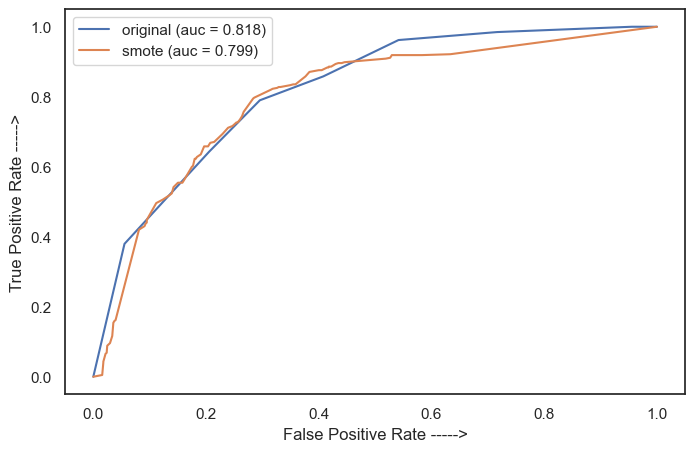

In [251]:
from sklearn.metrics import roc_curve, auc

tpr = [] # True positive rate
fpr = [] # False positive rate
thd = [] # Threshold
aucl = [] # Area under roc curve

pl = 0

print('Decision Tree')
plt.figure(figsize = (8,5), dpi = 100)
for sName, s in sampling.items():
    fpr.append(roc_curve(y_test, prob_list_dt[pl])[0])
    tpr.append(roc_curve(y_test, prob_list_dt[pl])[1])
    thd.append(roc_curve(y_test, prob_list_dt[pl])[2])
    aucl.append(auc(fpr[pl],tpr[pl]))

    plt.plot(fpr[pl],tpr[pl], linestyle = '-', label = f'{sName} (auc = {aucl[pl]:.3f})')
    pl += 1

plt.xlabel('False Positive Rate ----->')
plt.ylabel('True Positive Rate ----->')

plt.legend()
plt.show()

In [272]:
df['Total Charges'].min()

18.8

In [252]:
model_desired = DecisionTreeClassifier(max_depth=9, random_state=42)
model_desired.fit(x_train,y_train)

y_predict = model_desired.predict(x_test)
accuracy_score(y_test,y_predict)

0.7825159914712153

In [253]:
categorical_cols

Index(['Senior Citizen', 'Partner', 'Dependents', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Tenure Group'],
      dtype='object')

In [254]:
numerical_cols

Index(['Monthly Charges', 'Total Charges'], dtype='object')

In [261]:
# x_input = [['Yes','Yes','No','Fiber optic','No','No','Yes','Yes','Yes','No','Month-to-month','Yes','Electronic check',35,153.5,'1-12']]

x_input = np.array([['No', 'No', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 35, 153.5, '49-60']])
columns = ['Senior Citizen', 'Partner', 'Dependents', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Tenure Group']
new_x = pd.DataFrame(x_input, columns=columns)

# categorical_cols = new_x.select_dtypes(include=['object']).columns
# numerical_cols = new_x.select_dtypes(include=['float64', 'int64']).columns

x_input_preprocessed = preprocessor.transform(new_x)

In [262]:
y_predict = model_desired.predict(x_input_preprocessed)
print(y_predict)

[0]


In [76]:
import pickle

In [263]:
data = {'model': model_desired, 'preprocess': preprocessor}
with open ('saved_model.pkl','wb') as file:
    pickle.dump(data,file)

In [264]:
with open ('saved_model.pkl','rb') as file:
    data = pickle.load(file)

model_loaded = data['model']
preprocessor_loaded = data['preprocess']

In [279]:
x_input = np.array([['No', 'No', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Electronic check', 38.37, 153.5, '49-60']])
columns = ['Senior Citizen', 'Partner', 'Dependents', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Tenure Group']
new_x = pd.DataFrame(x_input, columns=columns)

x_input_preprocessed_loaded = preprocessor_loaded.transform(new_x)

In [280]:
y_try = model_loaded.predict(x_input_preprocessed_loaded)
y_try

array([0], dtype=int64)

In [276]:
if y_try == 0:
    print('yes')

yes


## 3.2 K-Nearest Neighbors

In [ ]:
param_grid_knn = {
    'n_neighbors': [3,5,7],
    'weights': ['uniform', 'distance']
}

prob_list_knn = []
result_knn = []
knn = KNeighborsClassifier()

for sName, s in sampling.items():
    grid_search = GridSearchCV(knn, param_grid = param_grid_knn, cv = kf)
    grid_search.fit(s[0], s[1])

    best_param = grid_search.best_params_

    best_model = knn.__class__(**best_param)
    best_model.fit(s[0], s[1])

    y_pred = best_model.predict(x_test)
    y_prob = best_model.predict_proba(x_test)[:, 1]

    prob_list_knn.append(y_prob)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    result_knn.append({
    'Model': 'K-Nearest Neighbors',
    'Sampling': sName,
    'Best Hyperparameters': best_param,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
    })

    print(f'K-Nearest Neighbors & {sName} - classification report')
    print(classification_report(y_test, y_pred))


K-Nearest Neighbors & original - classification report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1012
           1       0.62      0.56      0.59       395

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407

K-Nearest Neighbors & smote - classification report
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1012
           1       0.51      0.65      0.57       395

    accuracy                           0.73      1407
   macro avg       0.68      0.70      0.69      1407
weighted avg       0.75      0.73      0.74      1407



### ROC Curve - KNN

K-Nearest Neighbours


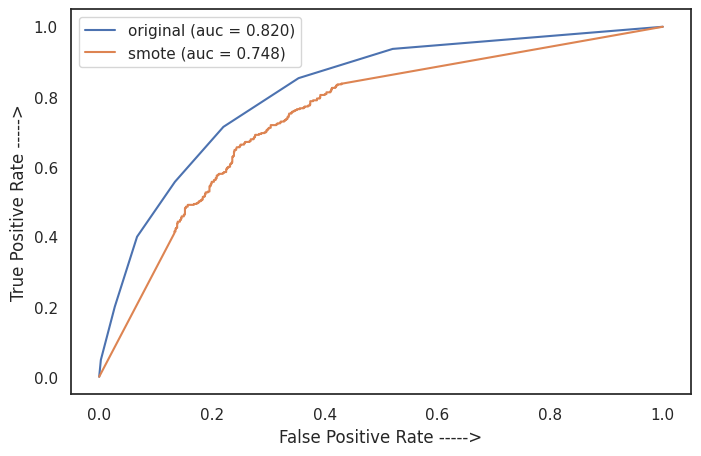

In [ ]:
from sklearn.metrics import roc_curve, auc

tpr = [] # True positive rate
fpr = [] # False positive rate
thd = [] # Threshold
aucl = [] # Area under roc curve

pl = 0

print('K-Nearest Neighbours')
plt.figure(figsize = (8,5), dpi = 100)
for sName, s in sampling.items():
    fpr.append(roc_curve(y_test, prob_list_knn[pl])[0])
    tpr.append(roc_curve(y_test, prob_list_knn[pl])[1])
    thd.append(roc_curve(y_test, prob_list_knn[pl])[2])
    aucl.append(auc(fpr[pl],tpr[pl]))

    plt.plot(fpr[pl],tpr[pl], linestyle = '-', label = f'{sName} (auc = {aucl[pl]:.3f})')
    pl += 1

plt.xlabel('False Positive Rate ----->')
plt.ylabel('True Positive Rate ----->')

plt.legend()
plt.show()

## 3.3 Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
}

prob_list_rf = []
result_rf = []

rf = RandomForestClassifier(random_state=42)

for sName, s in sampling.items():
    grid_search = GridSearchCV(rf, param_grid=param_grid_rf, cv=kf)
    grid_search.fit(s[0], s[1])

    best_param = grid_search.best_params_

    best_model = rf.__class__(**best_param, random_state=42)
    best_model.fit(s[0], s[1])

    y_pred = best_model.predict(x_test)
    y_prob = best_model.predict_proba(x_test)[:, 1]

    prob_list_rf.append(y_prob)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    result_rf.append({
        'Model': 'Random Forest',
        'Sampling': sName,
        'Best Hyperparameters': best_param,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f'Random Forest & {sName} - classification report')
    print(classification_report(y_test, y_pred))


Random Forest & original - classification report
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1012
           1       0.74      0.45      0.56       395

    accuracy                           0.80      1407
   macro avg       0.78      0.69      0.71      1407
weighted avg       0.79      0.80      0.78      1407

Random Forest & smote - classification report
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1012
           1       0.56      0.77      0.65       395

    accuracy                           0.77      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.80      0.77      0.78      1407



### ROC Curve - Random Forest

Random Forest


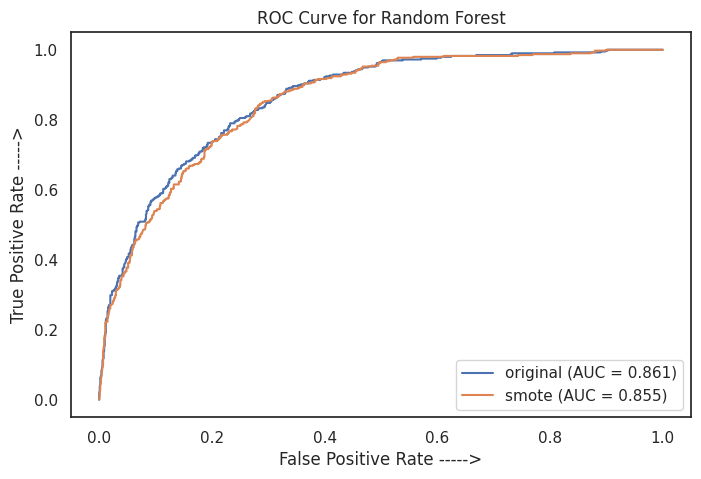

In [ ]:
tpr_rf = []
fpr_rf = []
thd_rf = []
aucl_rf = []

pl = 0

print('Random Forest')
plt.figure(figsize=(8, 5), dpi=100)
for sName in sampling.keys():
    fpr, tpr, thresholds = roc_curve(y_test, prob_list_rf[pl])
    roc_auc = auc(fpr, tpr)

    fpr_rf.append(fpr)
    tpr_rf.append(tpr)
    thd_rf.append(thresholds)
    aucl_rf.append(roc_auc)

    plt.plot(fpr, tpr, linestyle='-', label=f'{sName} (AUC = {roc_auc:.3f})')
    pl += 1

plt.xlabel('False Positive Rate ----->')
plt.ylabel('True Positive Rate ----->')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

## 3.4 Gradient Boosting

In [ ]:
# pip install scikit-optimize

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

ModuleNotFoundError: No module named 'skopt'

Modeling with default parameters

In [ ]:
# Initializes the gradient lift classifier
gb_classifier = GradientBoostingClassifier()

for sName, s in sampling.items():
  # Train
  gb_classifier.fit(s[0], s[1])

  # Predict
  y_pred = gb_classifier.predict(x_test)

  # Calculate the accuracy of the model
  accuracy = accuracy_score(y_test, y_pred)
  print("accuracy:", accuracy)

  # Output classification report
  print(f'Gradient Boosting Classifier & {sName} - classification report')
  print(classification_report(y_test, y_pred))

Tune parameters

In [ ]:
# # !!!!this may take aroud 20 mins!!
# param_grid_gb = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
# }

# gbm = GradientBoostingClassifier(random_state=42)
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=kf, refit='F1', verbose=1)

# prob_list_gbm = []
# result_gbm = []

# for sName, s in sampling.items():
#   grid_search.fit(s[0], s[1])

#   # Output the best parameter combination and the best score
#   print(f'Gradient Boosting Classifier & {sName}')
#   print("Optimum parameter combination:", grid_search.best_params_)
#   print("Best score:", grid_search.best_score_)

#   best_param = grid_search.best_params_
#   gbm_model = grid_search.best_estimator_

#   best_model = gbm.__class__(**best_param)
#   best_model.fit(s[0], s[1])

#   y_pred = best_model.predict(x_test)
#   y_prob = best_model.predict_proba(x_test)[:, 1]

#   prob_list_gbm.append(y_prob)

#   accuracy = accuracy_score(y_test, y_pred)
#   precision = precision_score(y_test, y_pred, pos_label=1)
#   recall = recall_score(y_test, y_pred, pos_label=1)
#   f1 = f1_score(y_test, y_pred, pos_label=1)

#   result_gbm.append({
#   'Model': 'Gradient Boosting Classifier',
#   'Sampling': sName,
#   'Best Hyperparameters': best_param,
#   'Accuracy': accuracy,
#   'Precision': precision,
#   'Recall': recall,
#   'F1 Score': f1
#   })

#   print(f'Gradient Boosting Classifier & {sName} - classification report')
#   print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Gradient Boosting Classifier & original

Optimum parameter combination: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Best score: 0.8072888888888888

Gradient Boosting Classifier & original - classification report

|---|precision|recall|f1-score|support|
|----|----|----|---|---|
|0 |0.85 |0.90 |0.87 |1012|
|1 |0.70 |0.58 |0.64 | 395|
|----|---|---|---|---|
|accuracy |---|---|0.81 |1407 |
|macro avg |0.77 |0.74 |0.75 |1407|
|weighted avg |0.81 |0.81 |0.81 |1407|

<br>
<br>
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Gradient Boosting Classifier & smote

Optimum parameter combination: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

Best score: 0.8603977862080472

Gradient Boosting Classifier & smote - classification report

|---|precision|recall|f1-score|support|
|----|----|----|---|---|
|0 |0.87 |0.84 |0.86 |1012|
|1 |0.63 |0.68 |0.65 | 395|
|----|---|---|---|---|
|accuracy |---|---|0.80 |1407 |
|macro avg |0.75 |0.76 |0.76 |1407|
|weighted avg |0.80 |0.80 |0.80 |1407|

              

### ROC Curve - Gradient Boosting Classifier

In [ ]:
tpr = [] # True positive rate
fpr = [] # False positive rate
thd = [] # Threshold
aucl = [] # Area under roc curve

pl = 0

print('Gradient Boosting Classifier')
plt.figure(figsize = (8,5), dpi = 100)
for sName, s in sampling.items():
    fpr_temp, tpr_temp, thd_temp = roc_curve(y_test, prob_list_gbm[pl])
    fpr.append(fpr_temp)
    tpr.append(tpr_temp)
    thd.append(thd_temp)
    aucl_temp = auc(fpr[pl], tpr[pl])
    aucl.append(aucl_temp)

    plt.plot(fpr[pl],tpr[pl], linestyle = '-', label = f'{sName} (auc = {aucl[pl]:.3f})')
    pl += 1

plt.xlabel('False Positive Rate ----->')
plt.ylabel('True Positive Rate ----->')

plt.legend()
plt.show()

## 3.5 Model Evaluation

Evaluation Table

In [78]:
pd.set_option('display.max_columns', None)

result = result_dt 
# + result_knn + result_rf + result_gbm

# Create the DataFrame
result_df = pd.DataFrame(result)

# Display the horizontally scrollable DataFrame
from IPython.display import display, HTML
display(HTML(result_df.to_html(classes='scrollable', index=False)))

Model,Sampling,Best Hyperparameters,Accuracy,Precision,Recall,F1 Score
Decision Tree,original,{'max_depth': 3},0.786070,0.728155,0.379747,0.499168
Decision Tree,smote,{'max_depth': 9},0.746979,0.537285,0.711392,0.612200


Evaluation Graph

In [ ]:
data = {
    'Model': ['Decision Tree', 'Decision Tree', 'K-Nearest Neighbors', 'K-Nearest Neighbors',
              'Random Forest', 'Random Forest', 'Gradient Boosting Classifier', 'Gradient Boosting Classifier'],
    'Sampling': ['original', 'smote', 'original', 'smote', 'original', 'smote', 'original', 'smote'],
    'Best Hyperparameters': ["{'max_depth': 3}", "{'max_depth': 9}", "{'n_neighbors': 7, 'weights': 'uniform'}",
                             "{'n_neighbors': 3, 'weights': 'distance'}", "{'max_depth': 5, 'n_estimators': 100}",
                             "{'max_depth': 5, 'n_estimators': 50}", "{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}",
                             "{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}"],
    'Accuracy': [0.786070, 0.746979, 0.778962, 0.727079, 0.800284, 0.768301, 0.812367, 0.797441],
    'Precision': [0.728155, 0.537285, 0.617978, 0.510934, 0.737500, 0.564246, 0.699088, 0.628505],
    'Recall': [0.379747, 0.711392, 0.556962, 0.650633, 0.448101, 0.767089, 0.582278, 0.681013],
    'F1 Score': [0.499168, 0.612200, 0.585885, 0.572383, 0.557480, 0.650215, 0.635359, 0.653706]
}

df_evaluation = pd.DataFrame(data)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Model Comparison', fontsize=16)

model_colors = {
    'Decision Tree': 'b',
    'K-Nearest Neighbors': 'g',
    'Random Forest': 'r',
    'Gradient Boosting Classifier': 'c'
}

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    for model in df_evaluation['Model'].unique():
        model_data = df_evaluation[df_evaluation['Model'] == model]
        ax.plot(model_data['Sampling'], model_data[metric], marker='o', label=model, color=model_colors[model])
    ax.set_title(metric)
    ax.set_xlabel('Sampling')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
